<a href="https://colab.research.google.com/github/vishalrec1/Python/blob/master/Keras_Regression_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## House Price Prediction Data Overview

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors



# Capture Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#We are using Kaggle Dataset for House Data Prediction in Montgomery County in California. The definition of the Features is given above
df = pd.read_csv('/tensorflow-1.15.2/python3.6/kc_house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.shape

(21597, 21)

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# **Exploratory Data Analysis**

In [0]:
#CHECK IF THERE IS ANY MISSING DATA

In [11]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [0]:
#GETTING DISTRIBUTIONS and CORRELATION OF DATA

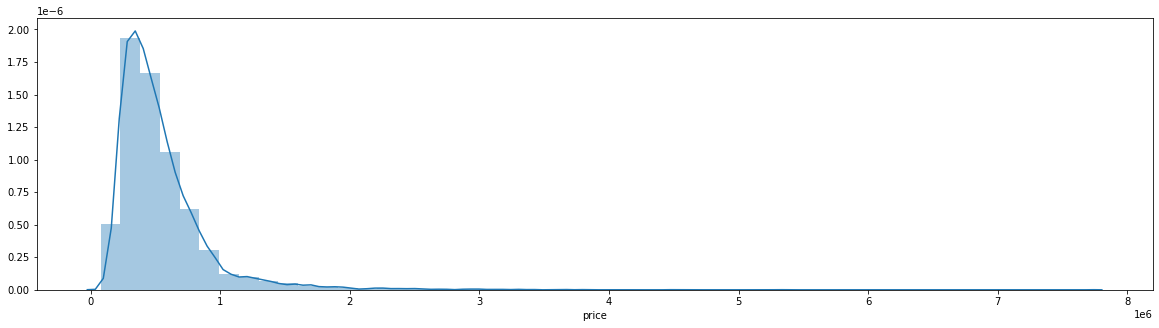

In [13]:
plt.figure(figsize=(20,5))
sns.distplot(df['price'])


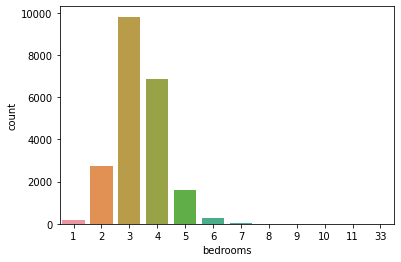

In [14]:
sns.countplot(df['bedrooms'])

In [15]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

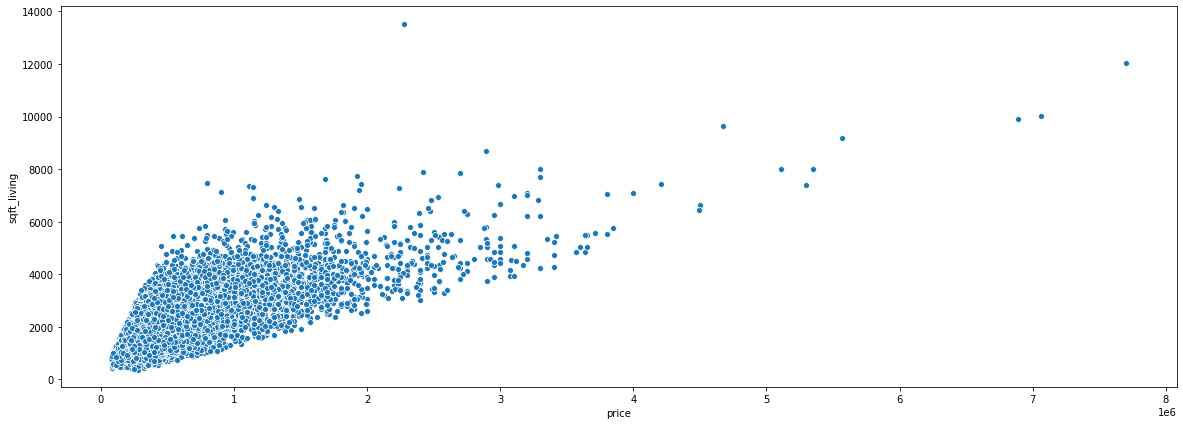

In [16]:
plt.figure(figsize = (20,7))
sns.scatterplot(data=df,x='price',y='sqft_living')

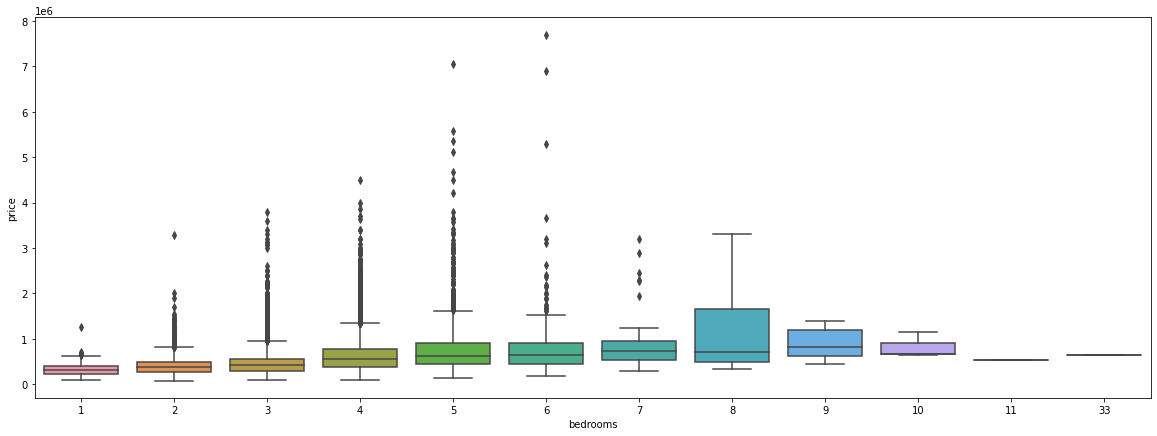

In [17]:
plt.figure(figsize=(20,7))
sns.boxplot(data=df,x='bedrooms',y='price')

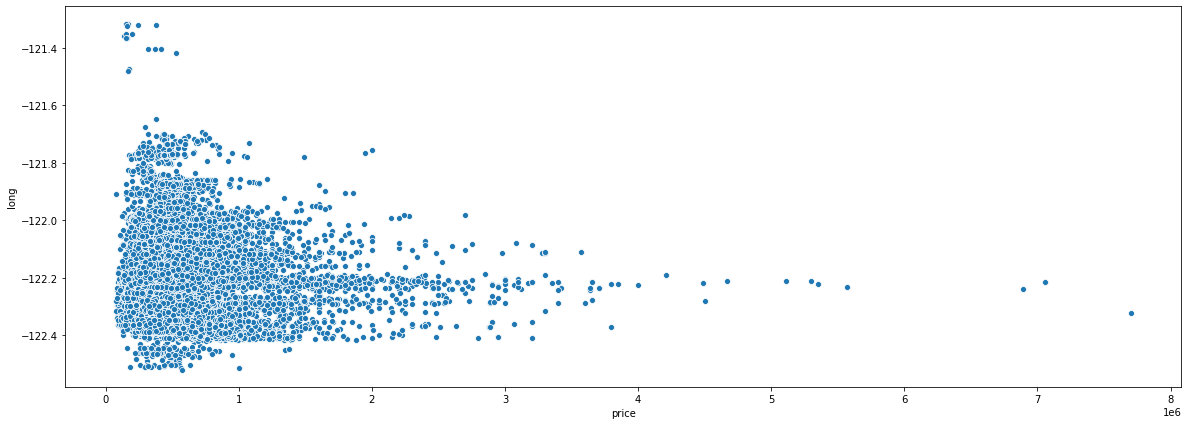

In [18]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=df,x='price',y='long')

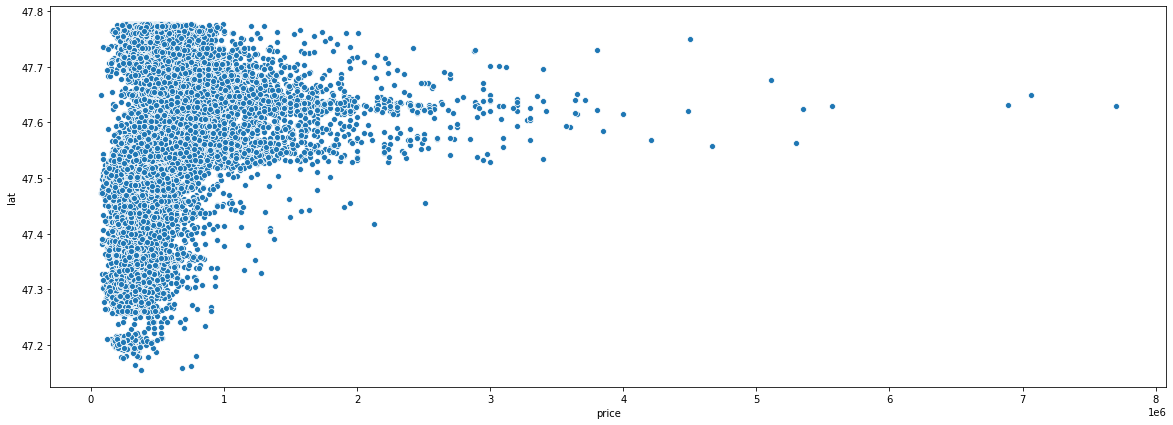

In [19]:
plt.figure(figsize=(20,7))
sns.scatterplot(data=df,x='price',y='lat')

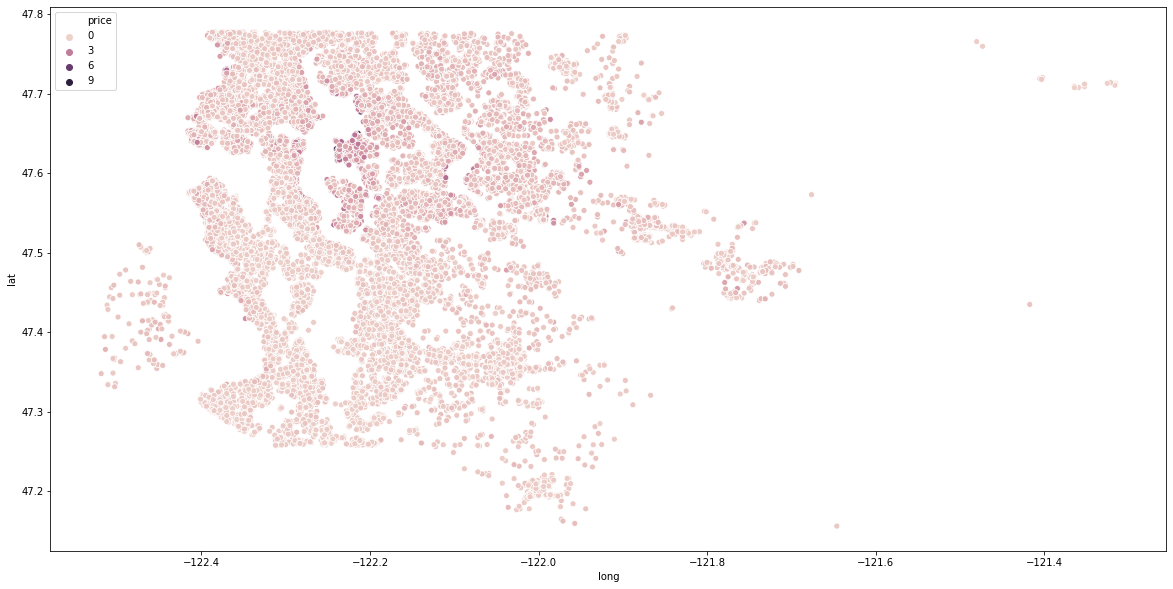

In [20]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x='long',y='lat',hue='price')

In [21]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
df.sort_values(by='price',ascending=False,axis=0)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,1623049041,5/8/2014,82500.0,2,1.00,520,22334,1.0,0,0,2,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
8267,3883800011,11/5/2014,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16184,3028200080,3/24/2015,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500


In [0]:
#REMOVING OUTLIERS (Houses whose Price > 3M or so)

In [0]:
df1 = df.sort_values(by='price',ascending=False,axis=0,ignore_index=True)

In [25]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
1,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
2,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
3,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
4,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [0]:
outlier_cleaned_df = df.sort_values(by='price',ascending=False,axis=0,ignore_index=True).loc[216:]

In [27]:
outlier_cleaned_df.shape

(21381, 21)

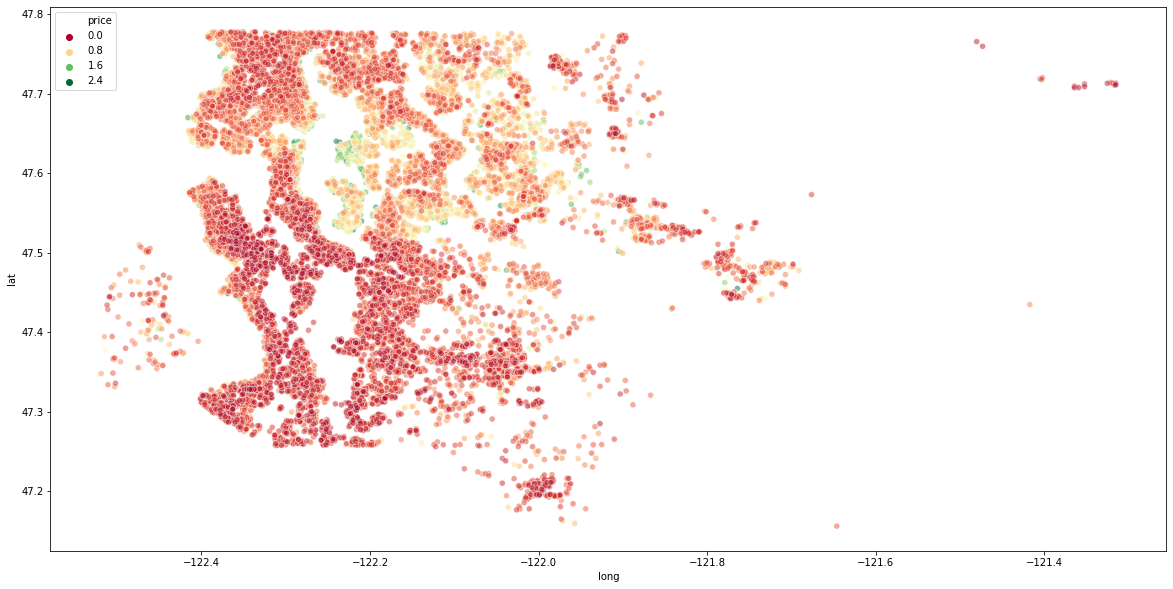

In [28]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=outlier_cleaned_df,x='long',y='lat',hue='price',alpha = 0.5,palette='RdYlGn')

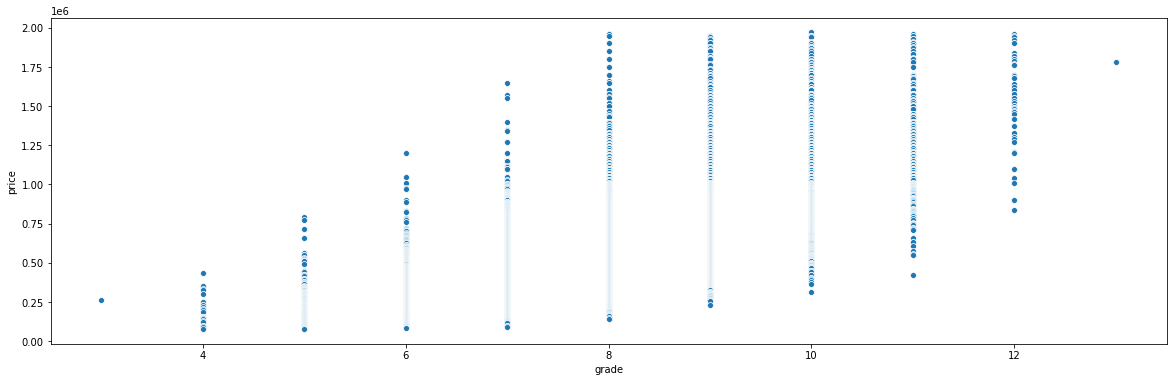

In [29]:
plt.figure(figsize = (20,6))
sns.scatterplot(data=outlier_cleaned_df,x='grade',y='price')

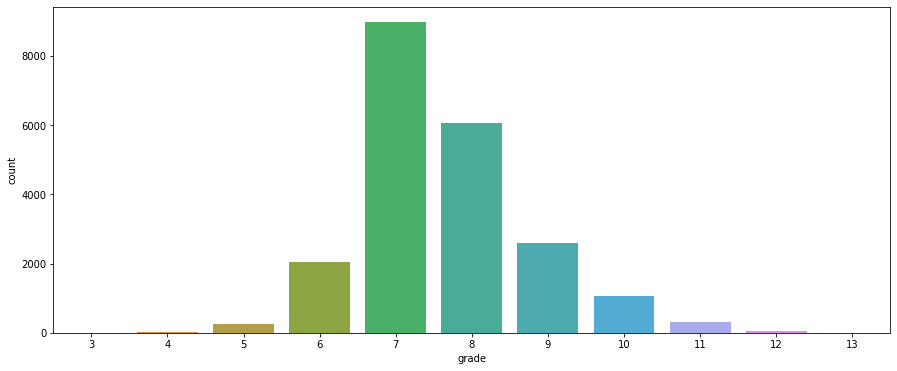

In [30]:
plt.figure(figsize = (15,6))
sns.countplot(data=outlier_cleaned_df,x='grade')

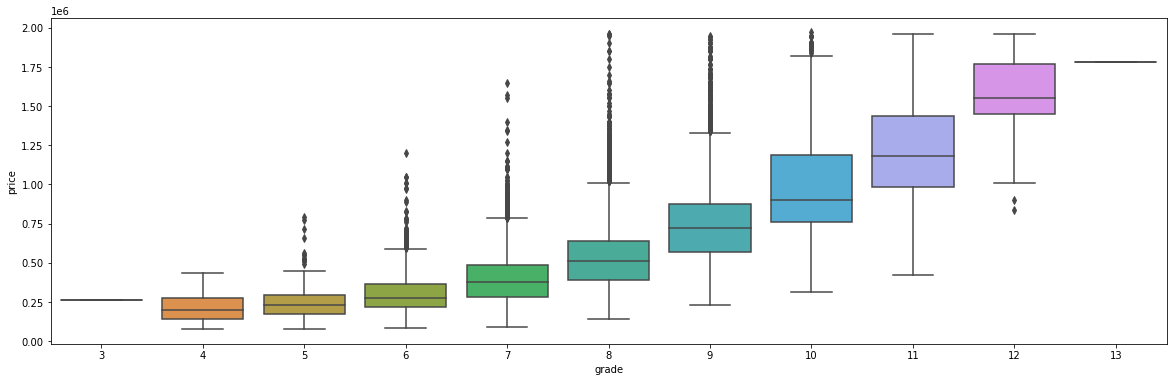

In [31]:
plt.figure(figsize = (20,6))
sns.boxplot(data=outlier_cleaned_df,x='grade',y='price')

# Feature Engineering

In [32]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
#Since 'id' column is not giving any value in our analysis, we can drop this column

In [34]:
df.shape

(21597, 21)

In [0]:
df.drop(labels=['id'],axis=1,inplace=True)

In [36]:
df.shape

(21597, 20)

In [0]:
#Now lets analyse Date Column and do some Feature Engineering

In [38]:
type(df['date'].loc[0])

str

In [0]:
#Convert the Datatype of the 'date' column to DateTime(Timestamp) datatype
df['date'] = pd.to_datetime(df['date'])

In [40]:
type(df['date'].loc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [41]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [0]:
df['year']= df['date'].apply(lambda x:x.year)

In [0]:
df['month'] = df['date'].apply(lambda x:x.month)

In [44]:
df.shape

(21597, 22)

In [45]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


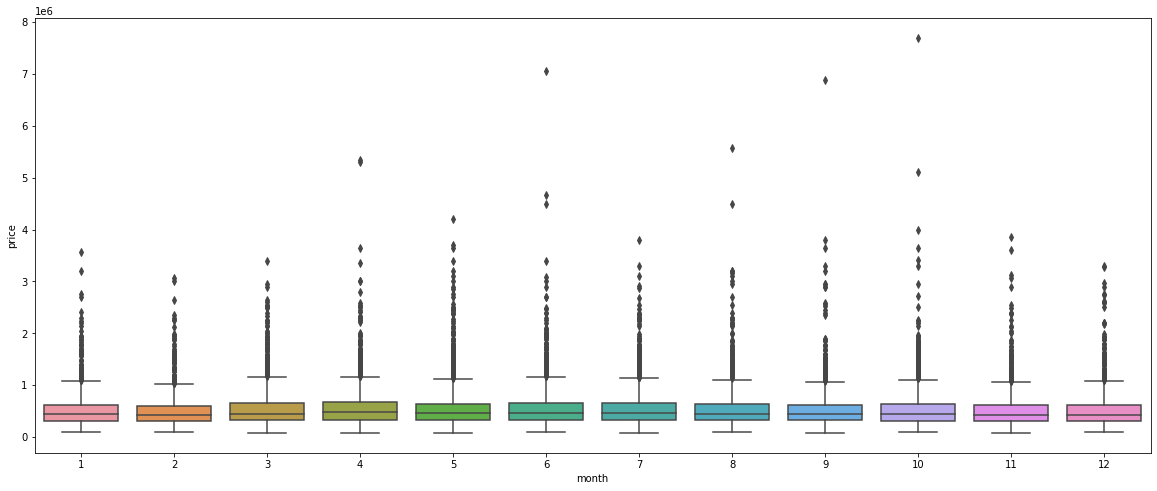

In [46]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df,x='month',y='price')

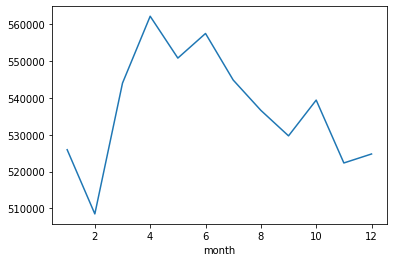

In [47]:
df.groupby('month').mean()['price'].plot()

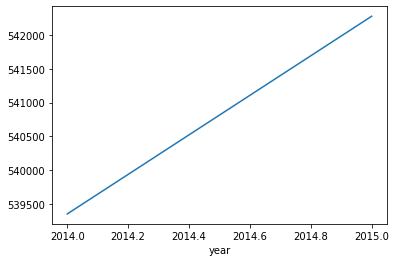

In [48]:
df.groupby('year').mean()['price'].plot()

In [0]:
df = df.drop(labels=['date'],axis=1)

In [50]:
df.shape

(21597, 21)

In [51]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [52]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [53]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21597.0,540296.573506,367368.140101,78000.0000,322000.0000,450000.0000,645000.000,7.700000e+06
bedrooms,21597.0,3.373200,0.926299,1.0000,3.0000,3.0000,4.000,3.300000e+01
bathrooms,21597.0,2.115826,0.768984,0.5000,1.7500,2.2500,2.500,8.000000e+00
sqft_living,21597.0,2080.321850,918.106125,370.0000,1430.0000,1910.0000,2550.000,1.354000e+04
sqft_lot,21597.0,15099.408760,41412.636876,520.0000,5040.0000,7618.0000,10685.000,1.651359e+06
floors,21597.0,1.494096,0.539683,1.0000,1.0000,1.5000,2.000,3.500000e+00
waterfront,21597.0,0.007547,0.086549,0.0000,0.0000,0.0000,0.000,1.000000e+00
view,21597.0,0.234292,0.766390,0.0000,0.0000,0.0000,0.000,4.000000e+00
condition,21597.0,3.409825,0.650546,1.0000,3.0000,3.0000,4.000,5.000000e+00
grade,21597.0,7.657915,1.173200,3.0000,7.0000,7.0000,8.000,1.300000e+01


In [54]:
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

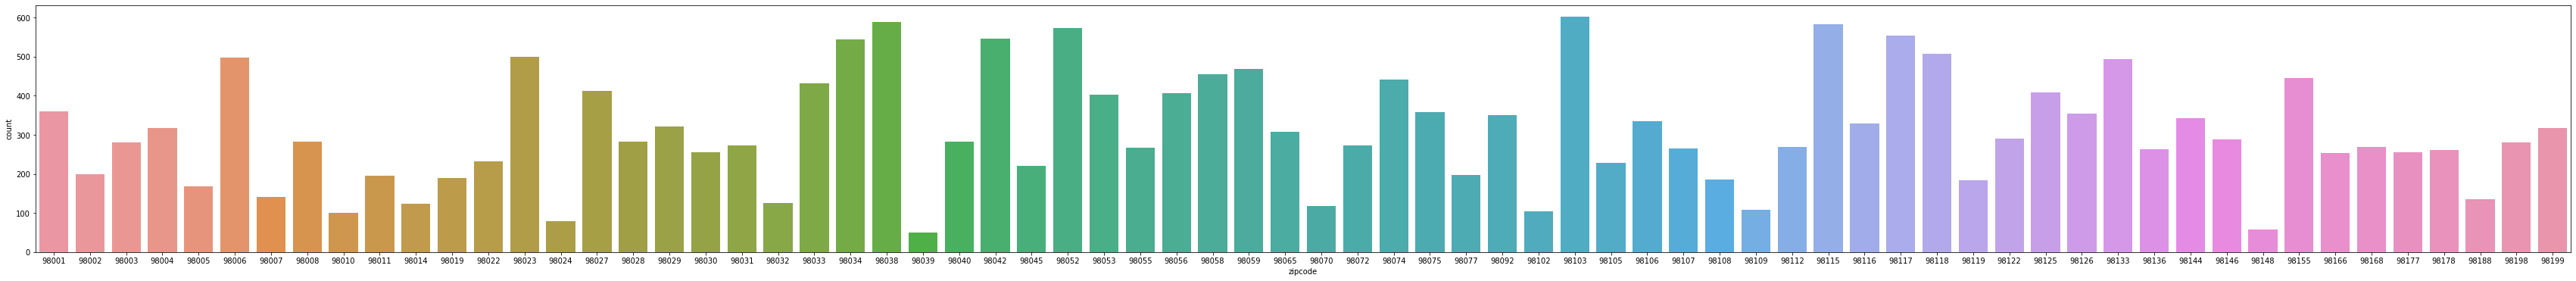

In [55]:
plt.figure(figsize=(60,6))
sns.countplot(data=df,x='zipcode')

# Test Train Dataset Split

In [0]:
#Create the Dataframe for Feature Set and Target Feature set

In [0]:
X = df.drop(labels = ['price'],axis=1).values
y = df['price'].values

In [0]:
#Split the Data into Train and Test Set

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 101)

In [0]:
#Scaling of Data

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

# Create the Model using Keras

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mse')

In [114]:
model.fit(x=X_train,y=y_train,epochs=400,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 428921487360.0000 - val_loss: 418398306304.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 427552735232.0000 - val_loss: 415170265088.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 415338561536.0000 - val_loss: 383817187328.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 344152539136.0000 - val_loss: 267870404608.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 196693442560.0000 - val_loss: 123871076352.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 114303418368.0000 - val_loss: 98046418944.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 100776042496.0000 - val_loss: 96475095040.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 100899045376.0000 - val_loss: 94993563648.0000
Epoch 9/400
119/119

In [0]:
losses_df = pd.DataFrame(model.history.history)

In [116]:
losses_df.head()

,loss,val_loss
0,4.289215e+11,4.183983e+11
1,4.275527e+11,4.151703e+11
2,4.153386e+11,3.838172e+11
3,3.441525e+11,2.678704e+11
4,1.966934e+11,1.238711e+11


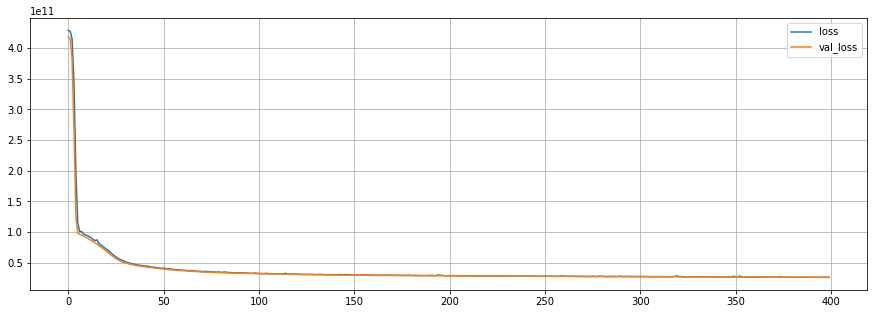

In [118]:
losses_df.plot(figsize = (15,5),grid=True)

# Model Evaluation

In [119]:
model.evaluate(x=X_test,y=y_test)

203/203 [==============================] - 0s 1ms/step - loss: 26121099264.0000


26121099264.0

In [120]:
model.evaluate(x=X_train,y=y_train)

473/473 [==============================] - 0s 1ms/step - loss: 26092478464.0000


26092478464.0

In [0]:
test_pred = model.predict(X_test)

In [122]:
test_pred

array([[368360.22],
       [589329.56],
       [577180.56],
       ...,
       [380741.34],
       [505051.16],
       [685367.94]], dtype=float32)

In [0]:
test_pred_df = pd.DataFrame(data = test_pred,columns=['Predicted_Value'])

In [128]:
test_pred_df

,Predicted_Value
0,368360.218750
1,589329.562500
2,577180.562500
3,377783.406250
4,447478.593750
...,...
6475,649574.375000
6476,213649.421875
6477,380741.343750
6478,505051.156250


In [0]:
actual_value_df = pd.DataFrame(data=y_test,columns=['Actual_Values'])

In [0]:
pred_df = pd.concat([actual_value_df,test_pred_df],axis = 1)

In [130]:
pred_df.head()

,Actual_Values,Predicted_Value
0,319000.0,368360.21875
1,464625.0,589329.56250
2,489950.0,577180.56250
3,395000.0,377783.40625
4,458000.0,447478.59375


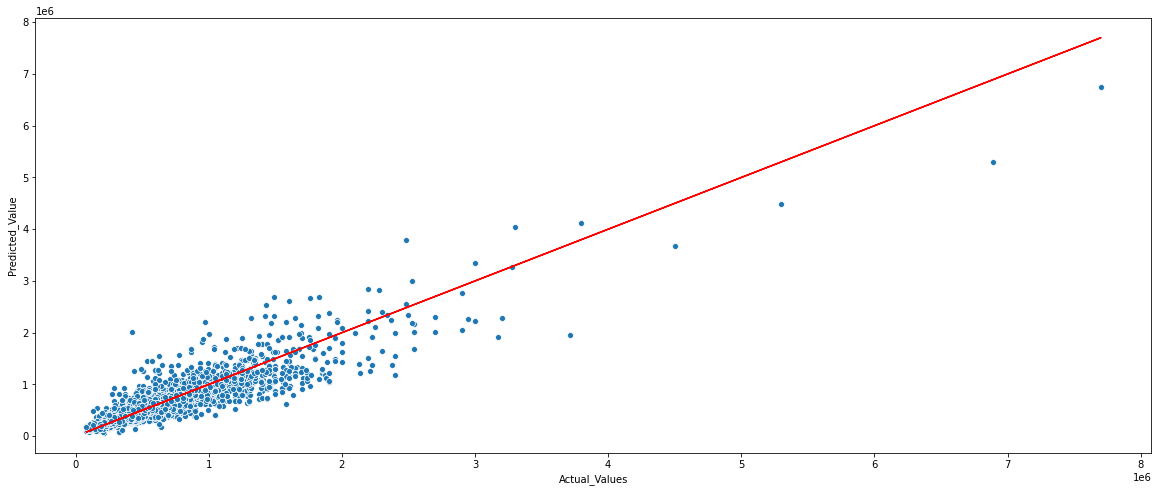

In [139]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=pred_df,x='Actual_Values',y='Predicted_Value')
plt.plot(y_test,y_test,'r')

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [135]:
mean_absolute_error(y_true=pred_df['Actual_Values'],y_pred=pred_df['Predicted_Value'])

100215.04732470101

In [136]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [137]:
5.402966e+05

540296.6

In [138]:
explained_variance_score(y_true=pred_df['Actual_Values'],y_pred=pred_df['Predicted_Value'])

0.8031219843323695

# Predict Price of New House on Sale

In [140]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [144]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
zipcode           98178.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
year               2014.0000
month                10.0000
Name: 0, dtype: float64

In [0]:
single_house = df.drop(labels=['price'],axis=1).iloc[0].values

In [167]:
single_house

array([ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
        1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
        7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
        0.00000e+00,  9.81780e+04,  4.75112e+01, -1.22257e+02,
        1.34000e+03,  5.65000e+03,  2.01400e+03,  1.00000e+01])

In [168]:
single_house.shape

(20,)

In [0]:
single_house = single_house.reshape(-1,20)

In [170]:
single_house  

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  9.81780e+04,  4.75112e+01, -1.22257e+02,
         1.34000e+03,  5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [171]:
scaler.transform(single_house)

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.89393939, 0.57149751,
        0.21760797, 0.16193426, 0.00582059, 0.        , 0.81818182]])

In [0]:
single_house = scaler.transform(single_house)

In [173]:
model.predict(single_house)

array([[268967.06]], dtype=float32)

In [175]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10


In [0]:
#Predicted Value is 268967.06
#Actual Value is 221900